In [4]:
import sys

import torch
import torchvision.datasets as datasets
from diffusers import DDIMScheduler
from matplotlib import pyplot as plt
from torch.utils.data import Subset
from torchvision.transforms import Compose, Normalize, Resize, ToTensor

sys.path.append("..")
from utils import (
    set_random_seed,
)

%matplotlib inline


In [5]:
# setup hyper parameters
SEED = 0x4090
set_random_seed(SEED)

# dataset choosing
DATASET, DATASET_PATH = "fmnist2mnist", "./data/"

IMG_SIZE = 28

# the step number adding noise in diffusion process
DIFFUSION_STEPS = 60
SCHEDULER = DDIMScheduler(num_train_timesteps=DIFFUSION_STEPS)
# All hyperparameters below is set to the values used for the experiments, which discribed in the article
EPSILON = 0.2
# R = 1000
N = 2
P = 1

# data sample settings
SUBSET_CLASS = 3

# plot settings
GRAY_PLOTS = True
# load dataset(FMNIST->MNIST[√], FACE->COMIC)
source_transform = Compose(
    [
        Resize((IMG_SIZE, IMG_SIZE)),
        ToTensor(),
        Normalize((0.5), (0.5)),
    ]
)
target_transform = source_transform

if DATASET == "fmnist2mnist":
    source = datasets.FashionMNIST
    target = datasets.MNIST
else:
    raise "Invalid dataset"
# generate intermediate datasets: ddim[√], flow, schodinger bridge, etc.
# the step number adding noise in diffusion process
source_dataset = source(
    root=DATASET_PATH, train=True, download=True, transform=source_transform
)
target_dataset = target(
    root=DATASET_PATH, train=True, download=True, transform=target_transform
)

source_indices = [
    i for i, label in enumerate(source_dataset.targets) if label == SUBSET_CLASS
]
target_indices = [
    i for i, label in enumerate(target_dataset.targets) if label == SUBSET_CLASS
]
source_indices = source_indices[: min(len(source_indices), len(target_indices))]
target_indices = target_indices[: min(len(source_indices), len(target_indices))]

source_dataset = Subset(source_dataset, source_indices)
target_dataset = Subset(target_dataset, target_indices)

x_0 = next(iter(source_dataset))[0]
x_1 = SCHEDULER.add_noise(
    x_0,
    torch.randn_like(x_0),
    torch.Tensor([0]).long(),
)
print(x_0.shape)
print(x_1.shape)


torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


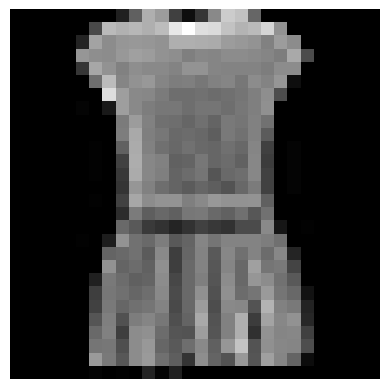

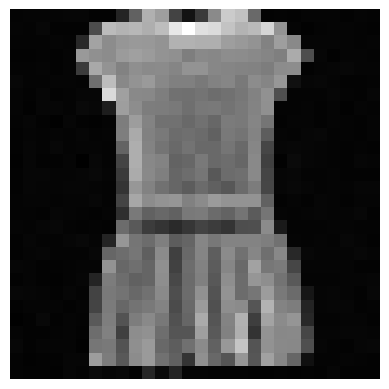

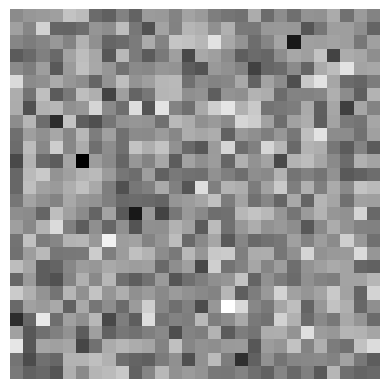

In [7]:
def plot_data_point(x):
    plt.imshow(x.squeeze().numpy(), cmap="gray")
    plt.axis("off")  # 不显示坐标轴
    plt.show()


plot_data_point(x_0)

plot_data_point(x_1)
plot_data_point((x_1 - x_0))
